<a href="https://colab.research.google.com/github/adidror005/HomeAssignment/blob/main/EMA_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install pandas-ta
!pip install numpy==1.23.5
!pip install catboost


In [13]:
3

3

In [14]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import pandas as pd
df = pd.read_parquet('/content/drive/MyDrive/dollar_bars_AMD.parquet')

In [16]:
import numpy as np
df['label_real']=np.log(df['close']/df['open']).shift(-1)
df['label']=np.sign(df['label_real'])


In [17]:
df=df.drop_duplicates(subset=['ts_end']).drop('ts_start',axis=1)
df.set_index('ts_end',inplace=True)
df.sort_index()
df=df.astype(np.float64)

In [18]:
df.open

,open
ts_end,
2017-01-03 14:31:12.032000,11.390
2017-01-03 14:31:52.190000,11.140
2017-01-03 14:33:45.154000,11.075
2017-01-03 14:35:03.433000,11.160
2017-01-03 14:36:11.302000,11.210
...,...
2025-05-08 19:54:40.227456,102.020
2025-05-08 19:56:52.507584,102.090
2025-05-08 19:58:34.941437,101.685


### Extract Features

In [19]:
import pandas_ta as ta
import warnings

def apply_indicators(df):
    """Apply technical indicators cleanly to the given DataFrame."""
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)

        # RSI
        df.ta.rsi(length=14, append=True,mamode="ewm",adjust=False)
        df.ta.rsi(length=840, append=True,mamode="ewm",adjust=False)
        df.ta.rsi(length=70, append=True,mamode="ewm",adjust=False)

        # PPO
        df.ta.ppo(fast=12, slow=26, signal=9, append=True,mamode="ewm",adjust=False)
        df.ta.ppo(fast=40, slow=200, signal=12, append=True,mamode="ewm",adjust=False)

        # Other Indicators
        df.ta.aroon(append=True,mamode="ewm",adjust=False)
        df.ta.bop(append=True,mamode="ewm",adjust=False)
        df.ta.stochrsi(append=True,mamode="ewm",adjust=False)

        df.ta.mfi(length=14, append=True,mamode="ewm",adjust=False)
        df.ta.mfi(length=70, append=True,mamode="ewm",adjust=False)

        df.ta.vwap(append=True,mamode="ewm",adjust=False)

        df.ta.kvo(append=True,mamode="ewm",adjust=False)


        df.ta.adx(length=14, append=True,mamode="ewm",adjust=False)
        df.ta.adx(length=70, append=True,mamode="ewm",adjust=False)
        df.ta.adx(length=840, append=True,mamode="ewm",adjust=False)

        df.ta.natr(length=14, append=True,mamode="ewm",adjust=False)
        df.ta.natr(length=70, append=True,mamode="ewm",adjust=False)
        df.ta.natr(length=840, append=True,mamode="ewm",adjust=False)

        #df.ta.sqz_indicator(append=True)

        df.ta.adosc(append=True,mamode="ewm",adjust=False)
        df.ta.pvr(append=True,mamode="ewm",adjust=False)
        df.ta.pvt(append=True,mamode="ewm",adjust=False)
        df.ta.chop(append=True,mamode="ewm",adjust=False)
        df.ta.rsx(append=True,mamode="ewm",adjust=False)
        df.ta.rvgi(append=True,mamode="ewm",adjust=False)
        df.ta.uo(append=True,mamode="ewm",adjust=False)
        df.ta.tsi(append=True,mamode="ewm",adjust=False)

    # Optional: enforce float64 everywhere
    return df
apply_indicators(df)

,open,high,low,close,volume,dollar_amount,label_real,label,RSI_14,RSI_840,...,ADOSC_3_10,PVR,PVT,CHOP_14_1_100,RSX_14,RVGI_14_4,RVGIs_14_4,UO_7_14_28,TSI_13_25_13,TSIs_13_25_13
ts_end,,,,,,,,,,,,,,,,,,,,,
2017-01-03 14:31:12.032000,11.390,11.4200,11.1300,11.1400,724308.0,8.148353e+06,-0.004498,-1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 14:31:52.190000,11.140,11.3500,11.0200,11.0900,736572.0,8.155688e+06,0.007198,1.0,NaN,NaN,...,NaN,3.0,-3.305978e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 14:33:45.154000,11.075,11.3500,11.0597,11.1550,732244.0,8.146119e+06,0.004381,1.0,NaN,NaN,...,NaN,2.0,9.858033e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 14:35:03.433000,11.160,11.4200,11.1500,11.2090,727580.0,8.158092e+06,-0.000892,-1.0,NaN,NaN,...,NaN,2.0,4.507930e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03 14:36:11.302000,11.210,11.4200,11.1600,11.2000,771128.0,8.651617e+06,-0.006275,-1.0,NaN,NaN,...,NaN,3.0,3.888771e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-08 19:54:40.227456,102.020,102.3434,101.8500,102.0800,502640.0,5.126439e+07,-0.004023,-1.0,34.519122,50.941267,...,-810895.727762,1.0,8.903679e+07,47.448434,34.977468,-0.123359,-0.107927,25.236077,-19.635582,-11.876824
2025-05-08 19:56:52.507584,102.090,102.1972,101.6612,101.6801,503700.0,5.128271e+07,0.000049,1.0,30.189645,50.863747,...,-890169.582510,3.0,8.883947e+07,45.425253,31.168217,-0.148419,-0.120141,18.657525,-22.939697,-13.457235
2025-05-08 19:58:34.941437,101.685,101.8901,101.5600,101.6900,504334.0,5.127041e+07,0.000393,1.0,30.422301,50.865600,...,-875752.660708,1.0,8.884438e+07,43.643554,27.832388,-0.173379,-0.137897,21.209916,-25.478334,-15.174534


In [20]:
df=df[df.label_real.abs()>0.0001]

In [21]:
features=[
 'RSI_14',
 'RSI_840',
 'RSI_70',
 'PPO_12_26_9',
 'PPOh_12_26_9',
 'PPOs_12_26_9',
 'PPO_40_200_12',
 'PPOh_40_200_12',
 'PPOs_40_200_12',
 'AROOND_14',
 'AROONU_14',
 'AROONOSC_14',
 'BOP',
 #'STOCHRSIk_14_14_3_3',
 #'STOCHRSId_14_14_3_3',
 'MFI_14',
 'MFI_70',
 #'VWAP_D',
 #'KVO_34_55_13',
 #'KVOs_34_55_13',
 #'ADX_14',
 #'DMP_14',
 #'DMN_14',
 #'ADX_70',
 #'DMP_70',
 #'DMN_70',
 #'ADX_840',
 #'DMP_840',
 #'DMN_840',
 'NATR_14',
 'NATR_70',
 'NATR_840',
 #'SQZPRO_20_2.0_20_2_1.5_1',
 #'SQZPRO_ON_WIDE',
 #'SQZPRO_ON_NORMAL',
 #'SQZPRO_ON_NARROW',
 #'SQZPRO_OFF',
 #'SQZPRO_NO',
 #'ADOSC_3_10',
 #'PVR',
 #'PVT',
 #'CHOP_14_1_100',
 #'RSX_14',
 #'RVGI_14_4',
 #'RVGIs_14_4',
 'UO_7_14_28',
 #'TSI_13_25_13',
 #'TSIs_13_25_13'
 ]

0:	learn: 0.6931772	test: 0.6931441	best: 0.6931441 (0)	total: 123ms	remaining: 2m 2s
50:	learn: 0.6928893	test: 0.6930206	best: 0.6930206 (50)	total: 3.3s	remaining: 1m 1s
100:	learn: 0.6926838	test: 0.6929252	best: 0.6929252 (100)	total: 6.33s	remaining: 56.4s
150:	learn: 0.6925138	test: 0.6928559	best: 0.6928559 (150)	total: 9.35s	remaining: 52.6s
200:	learn: 0.6923582	test: 0.6927946	best: 0.6927944 (199)	total: 13.6s	remaining: 54s
250:	learn: 0.6922306	test: 0.6927480	best: 0.6927480 (250)	total: 16s	remaining: 47.9s
300:	learn: 0.6921411	test: 0.6927206	best: 0.6927206 (300)	total: 17.9s	remaining: 41.5s
350:	learn: 0.6920645	test: 0.6927025	best: 0.6927016 (349)	total: 18.8s	remaining: 34.7s
400:	learn: 0.6919766	test: 0.6926706	best: 0.6926706 (400)	total: 19.7s	remaining: 29.4s
450:	learn: 0.6919078	test: 0.6926469	best: 0.6926469 (450)	total: 20.5s	remaining: 25s
500:	learn: 0.6918488	test: 0.6926306	best: 0.6926306 (500)	total: 21.5s	remaining: 21.4s
550:	learn: 0.6917908	t

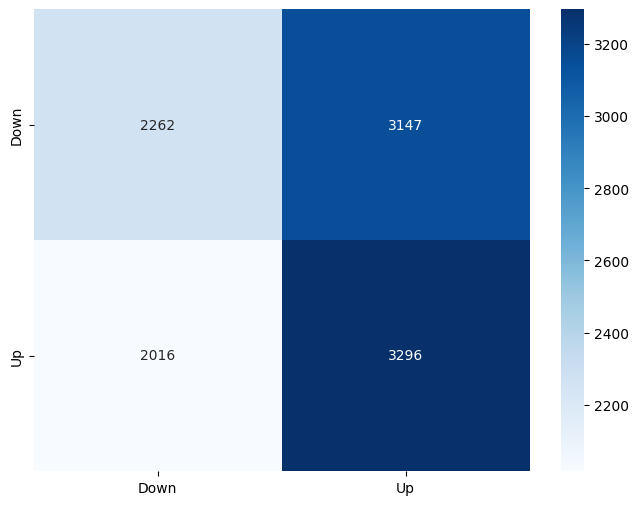

In [22]:
from sklearn.model_selection import TimeSeriesSplit

# Assuming 'df' is your DataFrame with a DateTimeIndex
# and 'features' is a list of your feature columns

# Create a TimeSeriesSplit object
# For example, to create 5 splits:
tscv = TimeSeriesSplit(n_splits=10)

# Iterate through the splits
for i,(train_index, test_index) in enumerate(tscv.split(df[features])):
    if i<9: continue
    X_train, X_test = df[features].iloc[train_index], df[features].iloc[test_index]
    y_train, y_test = df["label"].iloc[train_index], df["label"].iloc[test_index]

        # Create CatBoost classifier with random parameters
    from catboost import CatBoostClassifier

    # Create a CatBoost classifier
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.003,
        depth=4,
        loss_function="Logloss",
        #colsample_bylevel=0.3,
        rsm=0.3,
        random_strength=1.0,  # Increase for more randomness
        # bagging_temperature=1.0,  # Remove or comment out this line
        subsample=0.1,  # Use a subset of data for each iteration
        #bootstrap_type="Bayesian",  # Change to 'Bayesian' if you want to use bagging_temperature
        random_seed=42,  # Set random seed for reproducibility
        od_type="IncR",  # Overfitting detector
        od_wait=20,  # Number of iterations to wait before stopping
        verbose=50,  # Print progress every 50 iterations
    )

    # Fit the model
    model.fit(
        X_train,
        y_train,
        eval_set=(X_test, y_test),
        early_stopping_rounds=50,  # Stop if no improvement for 50 rounds
    )
    # Get confusion matrix
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])

    # Now you have X_train, X_test, y_train, y_test for each split
    # You can train your model on X_train, y_train and evaluate on X_test, y_test

### Look at Feature Importance

In [23]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,BOP,33.835535
1,UO_7_14_28,9.206777
2,RSI_14,7.138072
3,RSI_70,6.598316
4,MFI_14,4.426139
5,MFI_70,3.471456
6,PPOs_12_26_9,3.373993
7,PPOh_12_26_9,3.163732
8,PPO_12_26_9,3.090515
9,NATR_14,3.047995


### Save Model

In [25]:
model.save_model("/content/drive/MyDrive/catboost_model.cbm")